In [3]:
import pandas as pd
import numpy as np

## load dataset

In [4]:
df = pd.read_csv('datamiskinsidorejo100.csv')
df.sample()

FileNotFoundError: [Errno 2] No such file or directory: 'datamiskinsidorejo100.csv'

In [ ]:
df = df.drop(['nama'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   kelamin            143 non-null    object
 1   pendidikan         143 non-null    object
 2   pekerjaan          143 non-null    object
 3   jumlah_tanggungan  143 non-null    int64 
 4   lantai_rumah       143 non-null    object
 5   dinding_rumah      143 non-null    object
 6   daya_listrik       143 non-null    object
 7   sumber_air         143 non-null    object
 8   keputusan          143 non-null    object
dtypes: int64(1), object(8)
memory usage: 10.2+ KB


In [ ]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)

In [ ]:
numerical

['jumlah tanggungan']

In [ ]:
catgcols

['kelamin',
 'pendidikan',
 'pekerjaan',
 'lantai rumah',
 'dinding rumah',
 'daya listrik',
 'sumber air',
 'keputusan']

In [ ]:
df['keputusan'].value_counts()

keputusan
tidak miskin    63
miskin          37
Name: count, dtype: int64

In [ ]:
ind_col = [col for col in df.columns if col != 'keputusan']
dep_col = 'keputusan'

In [ ]:
df[dep_col].value_counts()

keputusan
tidak miskin    63
miskin          37
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df['keputusan'] = le.fit_transform(df['keputusan'])

In [ ]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [ ]:
df.head()

,kelamin,pendidikan,pekerjaan,jumlah tanggungan,lantai rumah,dinding rumah,daya listrik,sumber air,keputusan
0,0,1,3,1,0,1,1,0,1
1,0,1,3,1,0,2,1,0,1
2,0,2,4,2,0,2,1,0,1
3,1,1,0,0,0,1,0,0,0
4,1,1,5,0,1,1,0,0,0


In [ ]:
df.to_csv('data-numerik.csv')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## membuat model decision tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, 
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Classification Report : \n {classification_report(y_test, dtc.predict(x_test))}")

Akurasi Data Training = 0.9625
Akurasi Data Testing = 0.95 

Confusion Matrix : 
[[ 8  1]
 [ 0 11]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



## Simulasi Model

In [ ]:
input_data = (0,1,3,1,0,1,1,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Penduduk Tidak Miskin')
else :
    print ('Penduduk Miskin')

[1]
Penduduk Miskin


c:\Users\izal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Pohon Keputusan

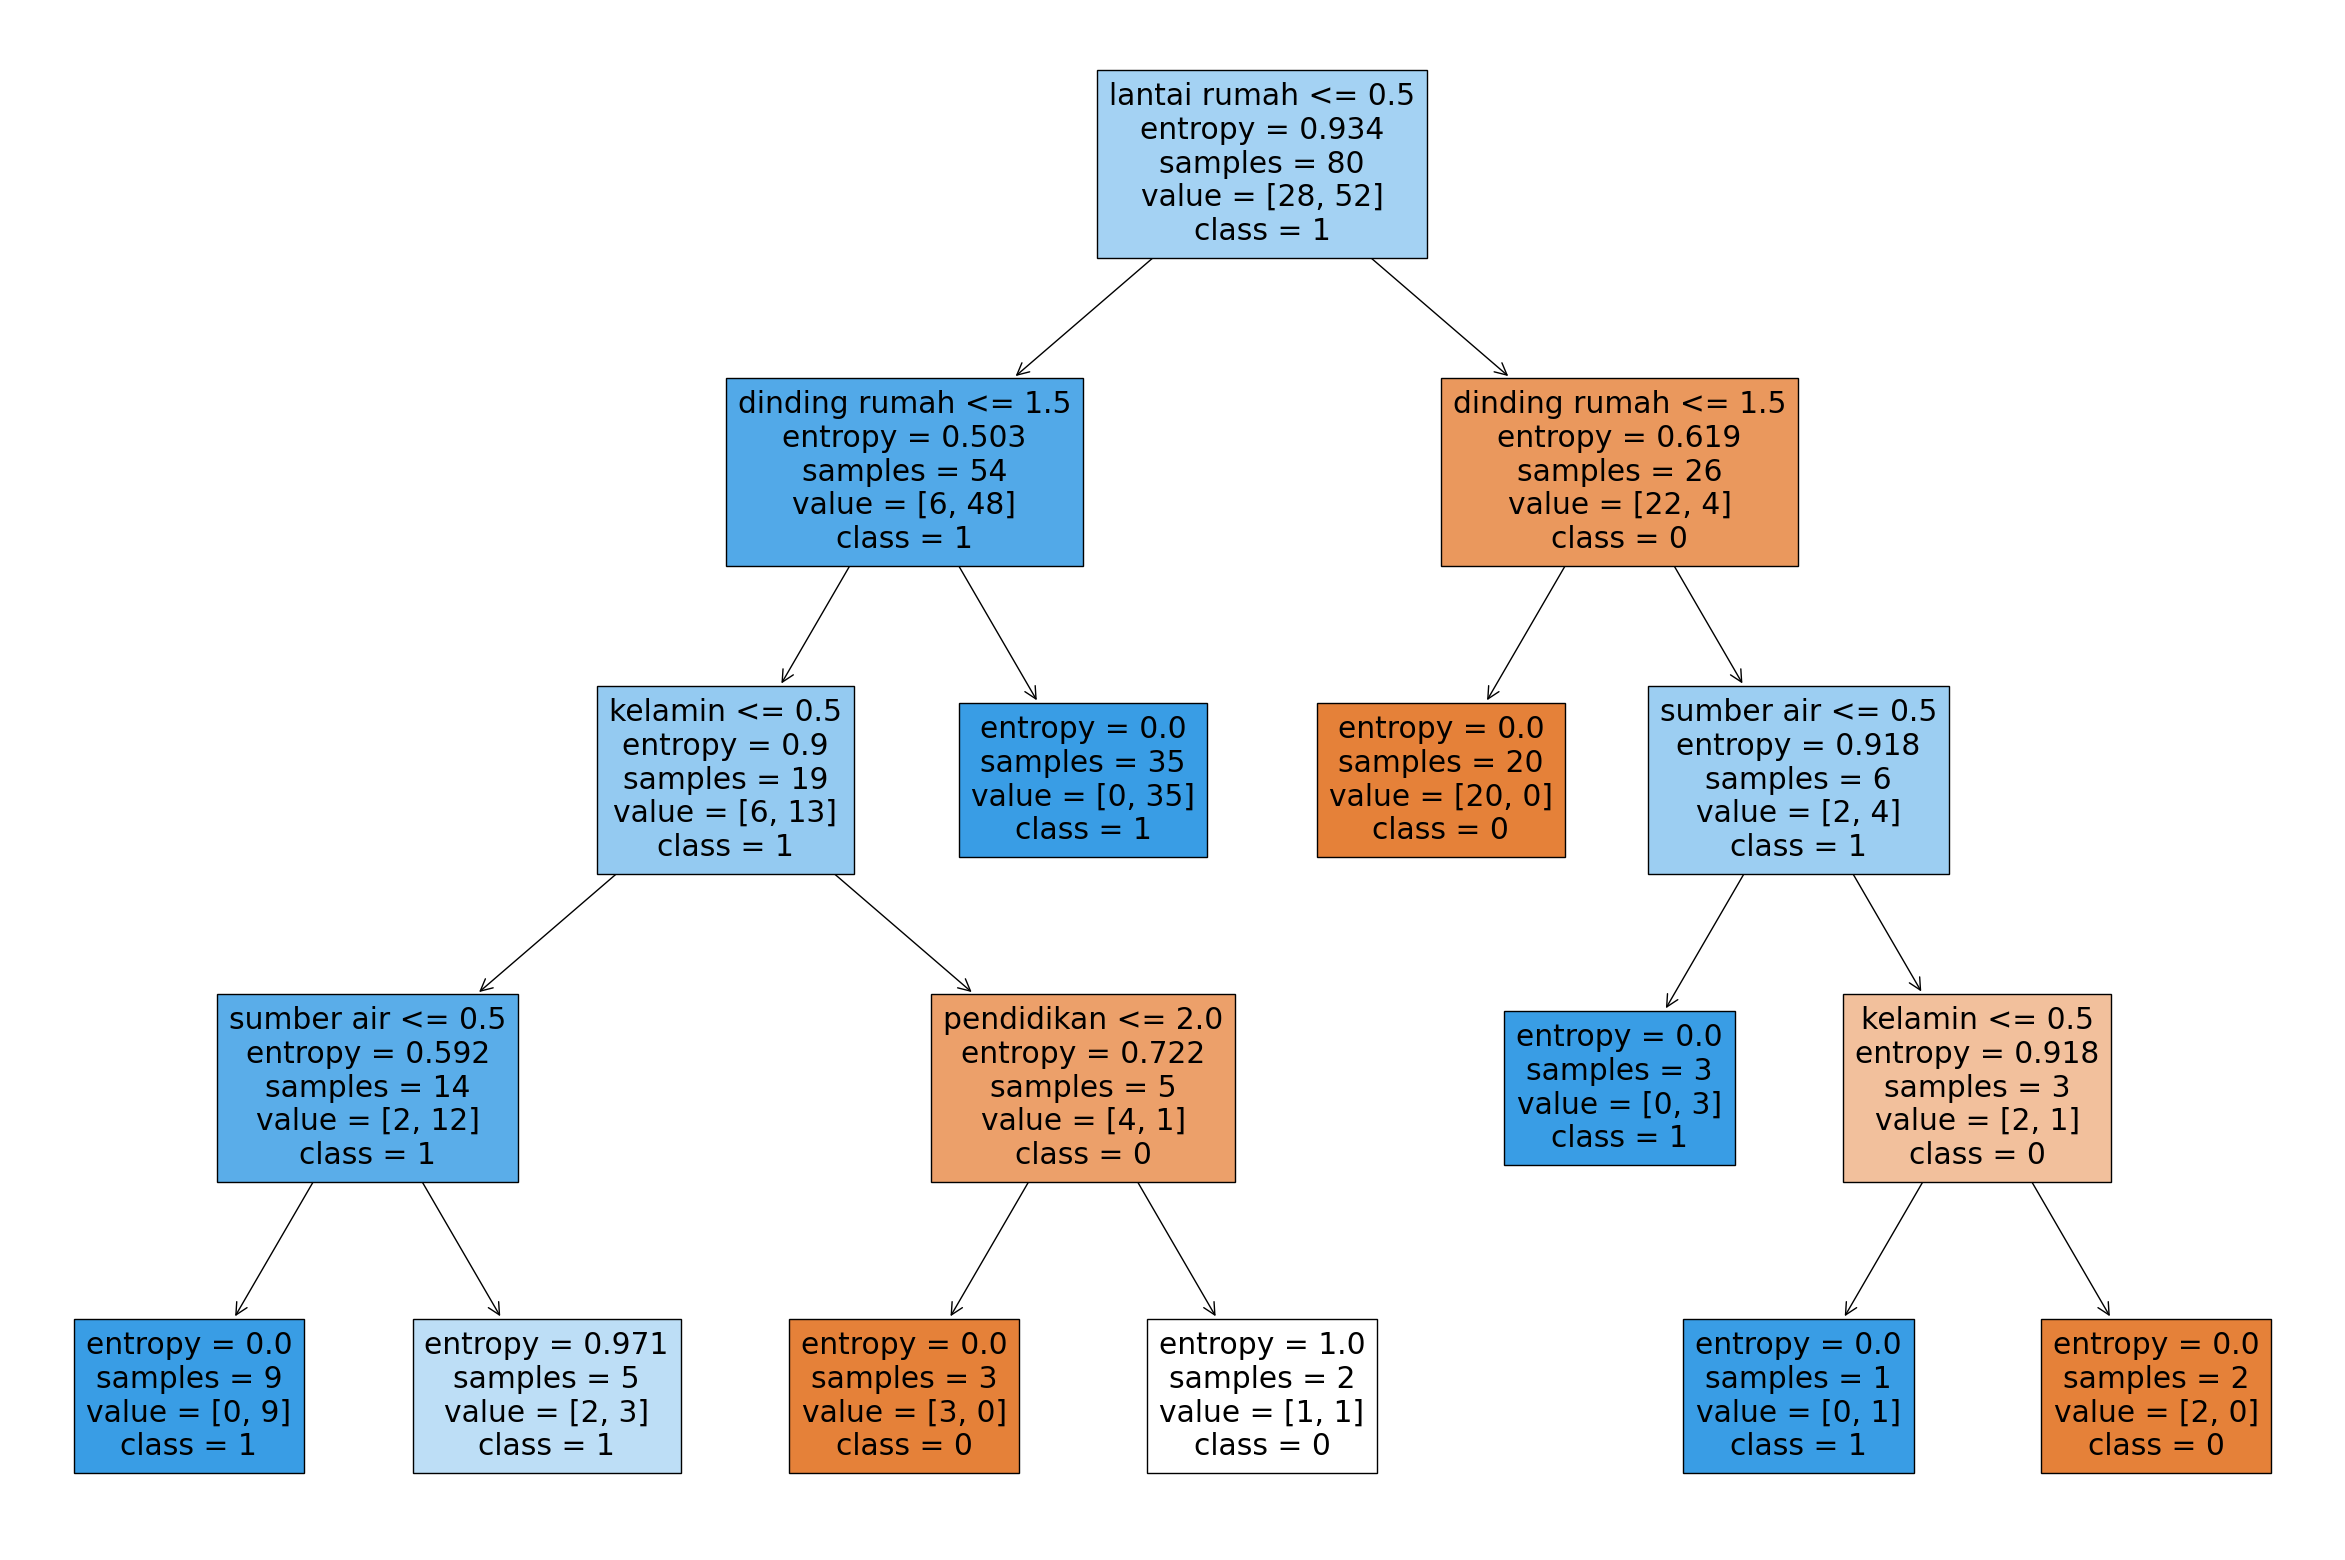

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model, 
                   feature_names=ind_col,
                   class_names=['0','1'],
                   filled=True)